# Dimensionality Reduction using <font color=red>Clustering</font>

- We are baseline digit classfication first. Later, we will use dimensionality reduction using Clustering (unsupervised learning) and apply the classification on reduced features to study the performance, etc.
- Both Clustering and Autoencoding comes under unsupervised models

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

<font color=red>__Baseline Classification of Digits__</font>

In [3]:
from sklearn.datasets import load_digits

digits_df = pd.DataFrame(load_digits().data)
digits_df['target'] = load_digits().target

In [4]:
digits_df.shape

(1797, 65)

In [5]:
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


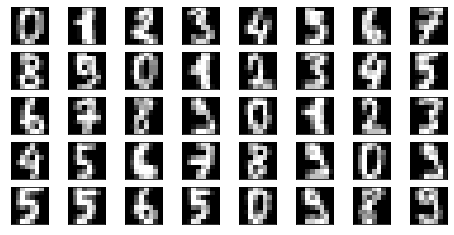

In [6]:
fig = plt.figure(figsize=(8, 4))

for i in range(40):
    ax = fig.add_subplot(5, 8, i+1, xticks=[], yticks=[])
    ax.imshow(load_digits().data[i].reshape(8, 8), cmap='gray', interpolation='nearest')

In [7]:
X = digits_df.drop('target', axis=1)
Y = digits_df['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
x_train.shape, y_train.shape

((1437, 64), (1437,))

In [9]:
x_test.shape, y_test.shape

((360, 64), (360,))

In [10]:
# 'saga' works very well with data in higher dimensions (i.e. we have 64 features)
# As the output we expect is from 0 through 9, it is 'multinomial' problem

classifier = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)

In [11]:
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = classifier.predict(x_test)

In [13]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [14]:
pred_results.sample(10)

,y_test,y_pred
227,1,1
1183,6,6
457,5,5
148,8,8
580,4,4
6,6,6
151,1,1
1661,4,4
753,1,1
1023,4,4


In [15]:
digits_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
digits_crosstab

y_test,0,1,2,3,4,5,6,7,8,9
y_pred,,,,,,,,,,
0,36,0,0,0,0,0,0,0,0,0
1,0,36,1,0,0,0,0,0,1,0
2,0,1,33,0,0,0,0,0,0,0
3,0,0,1,29,0,0,0,0,0,0
4,0,0,0,0,31,0,0,0,0,0
5,1,0,0,0,0,40,0,0,1,1
6,0,0,0,0,0,0,31,0,0,0
7,1,0,0,0,0,0,0,39,0,0
8,0,2,0,0,0,0,0,0,33,1


Observations:
- All diagonal values are correct classifications of digits
- Non-diagonal values are incorrect classifications of digits

In [17]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('accuracy score : ', acc)
print('precision score : ', precision)
print('recall score : ', recall)

accuracy score :  0.9611111111111111
precision score :  0.9615666544586342
recall score :  0.9611111111111111


__Dimensionality Reduction using <font color=red>KMeans Clustering__</font>

In [18]:
from sklearn.cluster import KMeans

# As we've 10 digits to be classified we consider n_clusters to be 10
kmeans = KMeans(n_clusters=10, n_init=500, max_iter=4000, random_state=0)

In [19]:
clusters = kmeans.fit_predict(X)

In [20]:
# digits = 10, pixels = 64
kmeans.cluster_centers_.shape

(10, 64)

In [21]:
# Original data
X.shape

(1797, 64)

In [22]:
# Express the original instances in terms of distane from the centroids of the 10 clusters
# It is a way of transforming data in 64 features in terms of 10 features/dimensions (the 10 features are 10 cluster centroids)

X_new = kmeans.transform(X)

In [23]:
# Notice that all 1797 features of 64 features transformed into features(=dimensions) of 10
X_new.shape

(1797, 10)

In [24]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1,2,3,4,5,6,7,8,9
0,46.350691,42.280133,41.742849,39.157789,40.685712,39.517846,44.735492,32.260940,14.002706,46.354852
1,38.334827,39.801414,44.373336,43.503530,39.336003,41.248628,25.279648,44.372077,54.076429,35.995643
2,40.229032,41.132772,43.335309,45.749389,44.091158,50.349395,31.080787,45.519250,47.752128,39.728085
3,32.669299,44.880478,41.767456,22.636003,48.947590,39.576246,39.040088,29.388426,44.162762,42.807248
4,52.647235,48.280432,40.173984,51.424493,28.283519,50.042842,42.819277,48.412814,45.605275,39.683401


Text(0, 0.5, 'Cluster distances for X[1]')

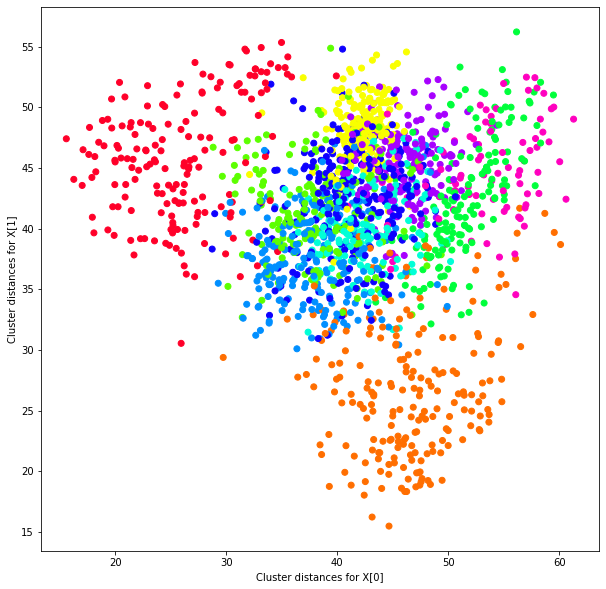

In [27]:
plt.figure(figsize=(10, 10))

plt.scatter(X_new[0], X_new[1], c=clusters, cmap='gist_rainbow')

plt.xlabel('Cluster distances for X[0]')
plt.ylabel('Cluster distances for X[1]')

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)

In [29]:
x_train.shape, y_train.shape

((1437, 10), (1437,))

In [30]:
x_test.shape, y_test.shape

((360, 10), (360,))

In [31]:
classifier = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)

In [32]:
# Fitting on the transformed lower dimension data
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = classifier.predict(x_test)

In [34]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [35]:
pred_results.sample(10)

,y_test,y_pred
1468,8,9
1372,1,1
331,2,2
620,6,6
916,1,1
1020,9,9
899,8,8
112,7,7
1353,6,6
1791,4,4


In [36]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('accuracy score : ', acc)
print('precision score : ', precision)
print('recall score : ', recall)

accuracy score :  0.9055555555555556
precision score :  0.908816227345639
recall score :  0.9055555555555556


Observations:
- Though we are working with 10 features out of 64 features (1/6th of features) the accuracy is good